<a href="https://colab.research.google.com/github/aruaru0/pytorch-tests/blob/main/sentensce_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence_transformers
!pip install googletrans==4.0.0-rc1

In [2]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
sentences = [
"Just chilling with some tunes and a good book.",
"Thinking about grabbing a coffee with friends later.",
"Stoked about the new movie coming out this weekend!",
"Feeling pumped for the upcoming road trip with the crew.",
"Craving some delicious pizza for dinner tonight.",
"Can't wait to hit the beach and catch some waves tomorrow.",
"Totally forgot about that assignment due tomorrow, oops!",
"Got lost in the world of video games for hours yesterday.",
"Finally finished binge-watching that new series on Netflix.",
"Feeling like a lazy couch potato today, no regrets."
]
embeddings = model.encode(sentences)
print(embeddings.shape)

(10, 512)


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
pairwise = cosine_similarity(embeddings)

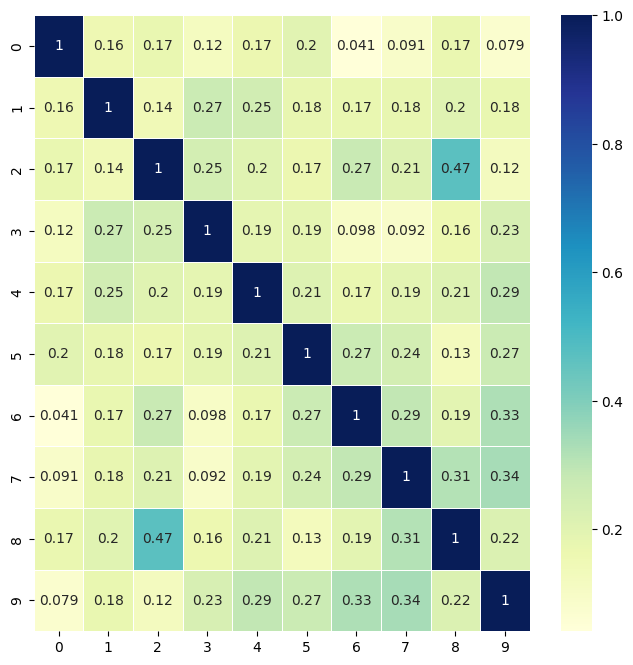

In [6]:
plt.figure(figsize = (8,8))
ax = sns.heatmap(pairwise, linewidth=0.5, annot=True, cmap="YlGnBu")
plt.show()

In [7]:
sentences = ["明日は晴れますか？　いいえ、明日は雨です。", "Will it be sunny tomorrow? No, it will rain tomorrow."]
embeddings = model.encode(sentences)
x = embeddings[0]
y = embeddings[1]
cosine_similarity(x.reshape(1, -1), y.reshape(1, -1))

array([[0.898783]], dtype=float32)

In [8]:
sentences = ["明日は晴れますか？　はい、明日は晴れです。", "Will it be sunny tomorrow? No, it will rain tomorrow."]
embeddings = model.encode(sentences)
x = embeddings[0]
y = embeddings[1]
cosine_similarity(x.reshape(1, -1), y.reshape(1, -1))

array([[0.77278]], dtype=float32)

In [9]:
sentences = ["明日は晴れますか？　はい、明日は晴れです。", "明日は晴れますか？　いいえ、明日は雨です。"]
embeddings = model.encode(sentences)
x = embeddings[0]
y = embeddings[1]
cosine_similarity(x.reshape(1, -1), y.reshape(1, -1))

array([[0.8550335]], dtype=float32)

Chat-GPTに以下のように指示して以下のようにして作成

```
10ワードほどの英文を適当に作成して、以下のフォーマットで出力してください

sentence = [
"1つ目の英文",
"2つ目の英文",
  :
]
```

In [10]:
sentences = [
"Just chilling with some tunes and a good book.",
"Thinking about grabbing a coffee with friends later.",
"Stoked about the new movie coming out this weekend!",
"Feeling pumped for the upcoming road trip with the crew.",
"Craving some delicious pizza for dinner tonight.",
"Can't wait to hit the beach and catch some waves tomorrow.",
"Totally forgot about that assignment due tomorrow, oops!",
"Got lost in the world of video games for hours yesterday.",
"Finally finished binge-watching that new series on Netflix.",
"Feeling like a lazy couch potato today, no regrets."
]

In [11]:
from googletrans import Translator
translator = Translator()

all = []
for sentence_en in sentences:
  sentence_ja = translator.translate(text=sentence_en, dest="ja").text
  emb_en = model.encode(sentence_en)
  emb_ja = model.encode(sentence_ja)
  all.append(sentence_en)
  all.append(sentence_ja)
  print("-"*100)
  print("English: ", sentence_en)
  print("Japanese: ", sentence_ja)
  print("cosine_similarity", cosine_similarity(emb_en.reshape(1, -1), emb_ja.reshape(1, -1)))

----------------------------------------------------------------------------------------------------
English:  Just chilling with some tunes and a good book.
Japanese:  いくつかの曲と良い本で冷えているだけです。
cosine_similarity [[0.82612586]]
----------------------------------------------------------------------------------------------------
English:  Thinking about grabbing a coffee with friends later.
Japanese:  後で友達とコーヒーをつかむことを考えています。
cosine_similarity [[0.8995351]]
----------------------------------------------------------------------------------------------------
English:  Stoked about the new movie coming out this weekend!
Japanese:  今週末にリリースされる新しい映画について興奮しました！
cosine_similarity [[0.93231857]]
----------------------------------------------------------------------------------------------------
English:  Feeling pumped for the upcoming road trip with the crew.
Japanese:  乗組員との今後のロードトリップのために興奮していると感じました。
cosine_similarity [[0.686803]]
-------------------------------------------------------------------

In [12]:
embeddings = model.encode(all)
print(embeddings.shape)

(20, 512)


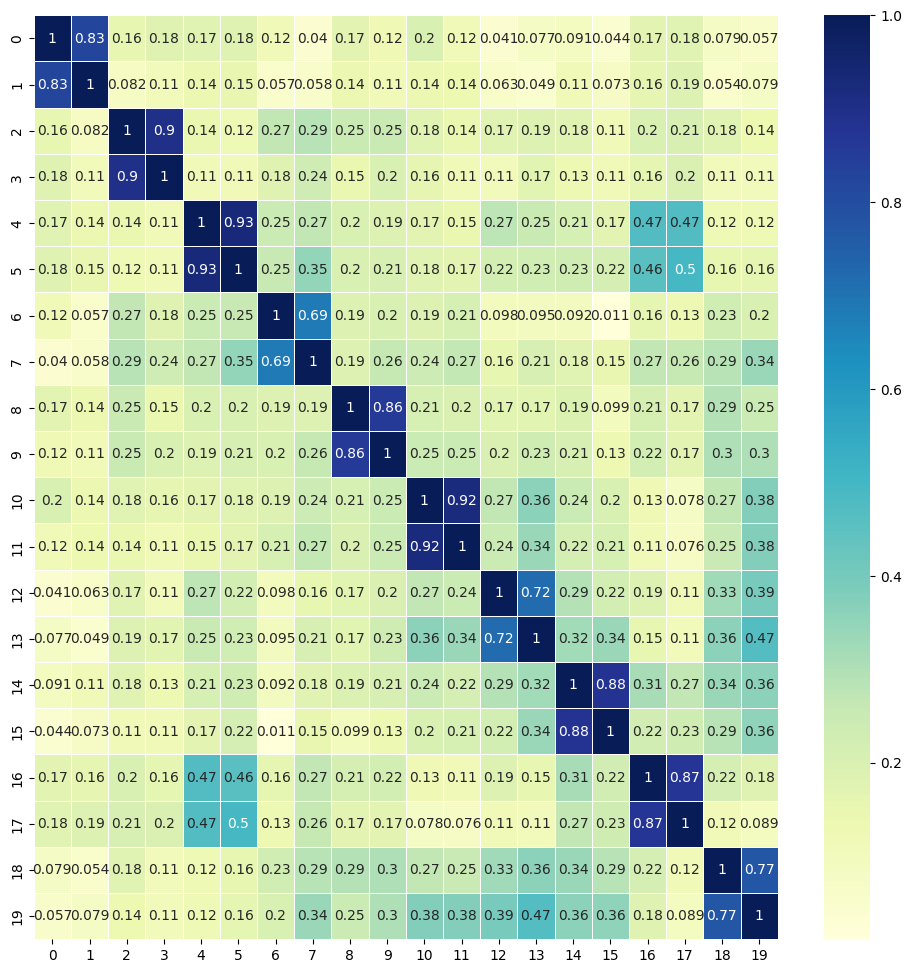

In [13]:
pairwise = cosine_similarity(embeddings)
plt.figure(figsize = (12,12))
ax = sns.heatmap(pairwise, linewidth=0.5, annot=True, cmap="YlGnBu")
plt.show()